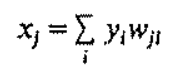

- i: units of input layer
- j: units of output layer
- $y_i$: output of input layer = input value
- $w_{ji}$: weights between input and output layer
- $x_j$: input of output layer

In [2]:
import torch

y_i = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)

w_ji = torch.rand(2, 1)

x_j = y_i @ w_ji

print(y_i)        # (4,2)
print(w_ji)       # (2,1)
print(x_j)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.0223],
        [0.9676]])
tensor([[0.0000],
        [0.9676],
        [0.0223],
        [0.9899]])


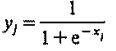

sigmoid: 0~1

- $y_j$: output of output layer

In [3]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

y_j = sigmoid(x_j)
print(y_j)

tensor([[0.5000],
        [0.7246],
        [0.5056],
        [0.7291]])


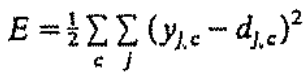

- c: input & output sample
- $y_{j,c}$: actual value
- $d_{j,c}$: desired value
- 1/2: to eliminate integer 2 to calculate simply after differentiating error function
- $^2$: to make error positive
- ∑: to express all errors as one value

In [4]:
d_j = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

E = 0.5 * torch.sum((y_j - d_j) ** 2)
print(E)

tensor(0.5509)


image.png

- $∂E / ∂y_j$: partial derivative about $y_j$

In [5]:
partial_derivative_yj = y_j - d_j
print(partial_derivative_yj)

tensor([[ 0.5000],
        [-0.2754],
        [-0.4944],
        [ 0.7291]])


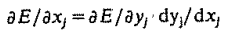

- $∂E / ∂x_j$: partial derivative about $x_j$
- $dy_j / dx_j$: sigmoid derivative
- Although there is no $x_j$ in error function, $y_j$ is related to $x_j$. Differentiate sigmoid and multiply to know how $x_j$ affects error function.

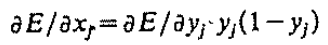

$y_j(1-y_j)$: sigmoid derivative

In [6]:
partial_derivative_xj = partial_derivative_yj * y_j * (1 - y_j)
print(partial_derivative_xj)

tensor([[ 0.1250],
        [-0.0549],
        [-0.1236],
        [ 0.1440]])


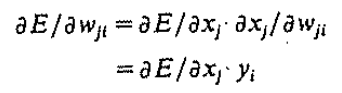

- Likewise, differentiate about $w_{ji}$ to know how $w_{ji}$ affects error function.

In [11]:
partial_derivative_wji = partial_derivative_xj * y_i
print(partial_derivative_wji)

tensor([[ 0.0000,  0.0000],
        [-0.0000, -0.0549],
        [-0.1236, -0.0000],
        [ 0.1440,  0.1440]])


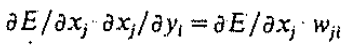

- This equation is equal to $∂E/∂y_i$ which means how input value affects error function.

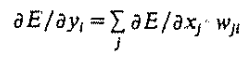

- Because input value is not changeable, $w_{ji}$ should be adjusted.

In [9]:
partial_derivative_yi = partial_derivative_xj * w_ji.T
print(partial_derivative_yi)

tensor([[ 0.0028,  0.1210],
        [-0.0012, -0.0532],
        [-0.0028, -0.1196],
        [ 0.0032,  0.1393]])


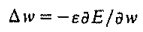

- ε: learning rate
- Updating weights to opposite direction of gradient

In [10]:
print("Original gradient of weights")
print(partial_derivative_wji)

ε = 0.1

for _ in range(5):
    Δw = -ε * partial_derivative_wji

    partial_derivative_wji += Δw

    print("Updated gradient of weights:")
    print(partial_derivative_wji)

Original gradient of weights
tensor([[ 0.0000,  0.0000],
        [-0.0000, -0.0549],
        [-0.1236, -0.0000],
        [ 0.1440,  0.1440]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0494],
        [-0.1112,  0.0000],
        [ 0.1296,  0.1296]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0445],
        [-0.1001,  0.0000],
        [ 0.1166,  0.1166]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0401],
        [-0.0901,  0.0000],
        [ 0.1050,  0.1050]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0360],
        [-0.0811,  0.0000],
        [ 0.0945,  0.0945]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0324],
        [-0.0730,  0.0000],
        [ 0.0850,  0.0850]])


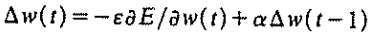

- $α$: decay factor (0 ~ 1), Why decay? $αΔw(t-1)$ decreases over time because weights change decreases during learning too.
- $Δw(t-1)$: weights change just before
- Adding $αΔw(t-1)$ can make updating quickly if $-ε∂E/∂w(t)$ and $αΔw(t-1)$ head same direction, and can reduce insufficient progress if they head different direction.
- αΔw(t−1) is called momentum today.

In [12]:
print("Original gradient of weights")
print(partial_derivative_wji)

prev_Δw = 0
ε = 0.1
α = 0.9

for _ in range(5):
    Δw = -ε * partial_derivative_wji + α * prev_Δw

    partial_derivative_wji += Δw
    prev_Δw = Δw

    print("Updated gradient of weights:")
    print(partial_derivative_wji)

Original gradient of weights
tensor([[ 0.0000,  0.0000],
        [-0.0000, -0.0549],
        [-0.1236, -0.0000],
        [ 0.1440,  0.1440]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0494],
        [-0.1112,  0.0000],
        [ 0.1296,  0.1296]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0396],
        [-0.0890,  0.0000],
        [ 0.1037,  0.1037]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0267],
        [-0.0601,  0.0000],
        [ 0.0700,  0.0700]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000, -0.0125],
        [-0.0280,  0.0000],
        [ 0.0327,  0.0327]])
Updated gradient of weights:
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0016],
        [ 0.0036,  0.0000],
        [-0.0042, -0.0042]])
